# Muhrec for python demonstration
This demonstration can currently only run in the same folder as the module files

## Load needed modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imgalg as ia
import muhrectomo as mt
import amglib.readers as io

In [2]:
import importlib
importlib.reload(mt)
importlib.reload(ia)

<module 'imgalg' from '/Users/kaestner/git/lib/lib/imgalg.cpython-38-darwin.so'>

# Create processing objects

In [3]:
recon = mt.Reconstructor(mt.bpMultiProj)
recon.name()

'Multi projection BP'

In [4]:
normalize = ia.NormalizeImage(True)
spotclean = ia.MorphSpotClean()
ringclean = ia.StripeFilter([100,100],"daub11",3,0.05) # sinogram dims are temporarily set to 100x100

## Configure normalization

In [5]:
ob = io.readImage("/Users/Shared/data/wooddata/projections/ob_0000.tif")
dc = io.readImage("/Users/Shared/data/wooddata/projections/dc_0000.tif")
normalize.setDoseROI([10,10,50,50])
normalize.setReferences(ob,dc)

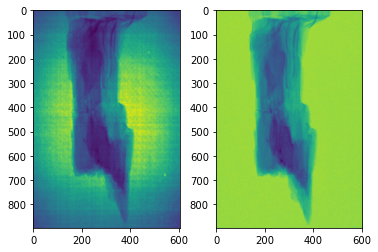

In [6]:
img = io.readImage("/Users/Shared/data/wooddata/projections/wood_0000.tif")

plt.subplot(1,2,1); plt.imshow(img)
normalize.process(img)
plt.subplot(1,2,2); plt.imshow(img)

In [7]:
proj = io.readImages("/Users/Shared/data/wooddata/projections/wood_{0:04d}.tif",first=0, last=625)

100%|██████████| 625/625 [00:18<00:00, 33.18it/s] 


In [8]:
normalize.process(proj)

In [9]:
p32=proj[:,500:532,:]

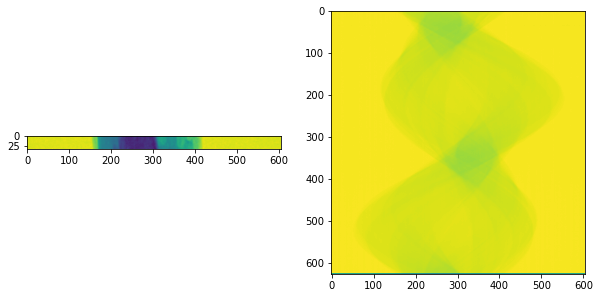

In [10]:
fig,ax = plt.subplots(1,2,figsize = (10,5)) 
ax[0].imshow(p32[0])
ax[1].imshow(p32[:,0,:])

In [11]:
spotclean.setCleanMethod(detectionMethod=ia.MorphDetectBoth ,cleanMethod=ia.MorphCleanReplace)

In [12]:
p=np.copy(p32[0])

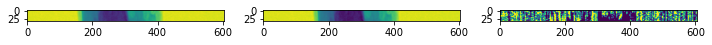

In [13]:
fig,ax = plt.subplots(1,3,figsize = (12,5)) 
ax[0].imshow(p)
spotclean.process(p,th=0.1,sigma=0.00001)
ax[1].imshow(p)
ax[2].imshow(0<(p-p[1]))

In [14]:
d=spotclean.detectionImage(p32[0])

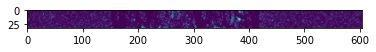

In [15]:
plt.imshow(d,vmin=0, vmax=0.1)

## Reconstruct projections

In [16]:
Nproj = p32.shape[0]

# Information per projection
args = {"angles"  : np.linspace(0,360,num=Nproj), 
        "weights" : np.ones(Nproj).astype('float32')/Nproj}

# Geometry information
recon.configure({   "center"        : 295, 
                    "resolution"    : 0.05,
                    "beamgeometry" : mt.BeamGeometryParallel
                })

In [17]:
recon.process(p32,args) # Reconstruct a part of the slices (32 slices here)

In [18]:
recon.matrixDims()

[604, 604, 32]

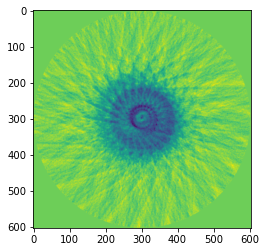

In [19]:
vol = recon.volume() # Retrieve the reconstructed volume

plt.imshow(vol[3]);

In [20]:
vol.shape

(32, 604, 604)

array([0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159744,
       0.00159744, 0.00159744, 0.00159744, 0.00159744, 0.00159